#Churn Modelling Data (P3- Churn-Modelling Data.xlsx)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
d3 = pd.read_excel("/content/sample_data/P3- Churn-Modelling Data.xlsx")
d3

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  churned  
0           101348.88        1  
1           112542.58        0  
2           113931.57        1  
3            93826.63        0  
4            79084.10        0  
...               ...      ...  
9995         96270.64        0  
9996        101699.77        0  
9997         42085.58        1  
9998         92888.52        1  
9999         38190.78        0  

[10000 rows x 14 columns]

**1.  Customer Demographics:**

- What is the distribution of customers across different age groups?

In [ ]:
a = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']


In [ ]:

d3['AgeGroup'] = pd.cut(d3['Age'], bins=a, labels=labels, right=False)
age_group_counts = d3['AgeGroup'].value_counts().sort_index()


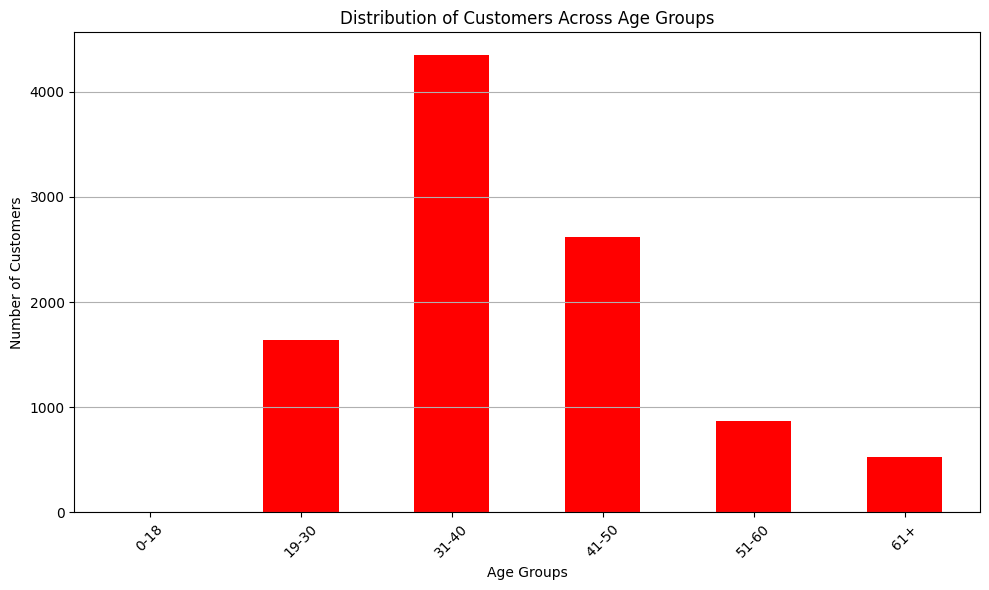

In [ ]:

plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='red')
plt.title('Distribution of Customers Across Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

   - Analyze the gender distribution of customers.



In [ ]:
gender_counts = d3['Gender'].value_counts()
gender_counts

Gender
Male      5457
Female    4543
Name: count, dtype: int64

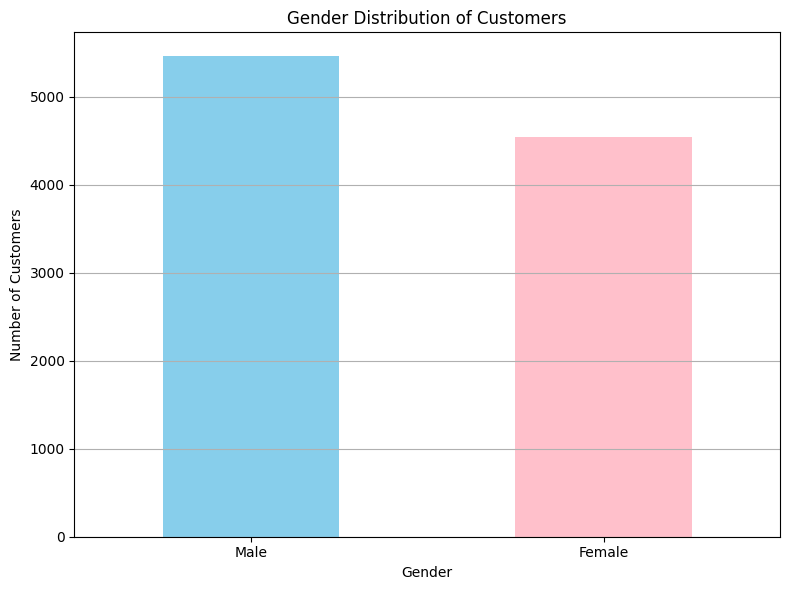

In [ ]:

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**2.  Churn Analysis:**

- What percentage of customers have churned

In [ ]:
churned_customers = d3['churned'].sum()
churned_customers

2037

In [ ]:
total_customers = d3.shape[0]
total_customers

10000

In [ ]:
churn_rate = (churned_customers / total_customers) * 100
churn_rate

20.369999999999997

In [ ]:
average_values_churned = d3[d3['churned'] == 1][['NumOfProducts', 'HasCrCard', 'IsActiveMember']].mean()
print("Average values for churned customers:")
print(average_values_churned)


Average values for churned customers:
NumOfProducts     1.475209
HasCrCard         0.699067
IsActiveMember    0.360825
dtype: float64


In [ ]:
average_values_retained = d3[d3['churned'] == 0][['NumOfProducts', 'HasCrCard', 'IsActiveMember']].mean()
print("\nAverage values for retained customers:")
print(average_values_retained)


Average values for retained customers:
NumOfProducts     1.544267
HasCrCard         0.707146
IsActiveMember    0.554565
dtype: float64


In [ ]:
import seaborn as sns

In [ ]:
df_churned = d3[d3['churned'] == 1]
df_churned

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
0             1    15634602     Hargrave          619    France  Female   42   
2             3    15619304         Onio          502    France  Female   42   
5             6    15574012          Chu          645     Spain    Male   44   
7             8    15656148       Obinna          376   Germany  Female   29   
16           17    15737452        Romeo          653   Germany    Male   58   
...         ...         ...          ...          ...       ...     ...  ...   
9981       9982    15672754     Burbidge          498   Germany    Male   42   
9982       9983    15768163      Griffin          655   Germany  Female   46   
9991       9992    15769959  Ajuluchukwu          597    France  Female   53   
9997       9998    15584532          Liu          709    France  Female   36   
9998       9999    15682355    Sabbatini          772   Germany    Male   42   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
2          8  159660.80              3          1               0   
5          8  113755.78              2          1               0   
7          4  115046.74              4          1               0   
16         1  132602.88              1          1               0   
...      ...        ...            ...        ...             ...   
9981       3  152039.70              1          1               1   
9982       7  137145.12              1          1               0   
9991       4   88381.21              1          1               0   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   

      EstimatedSalary  churned AgeGroup  
0           101348.88        1    41-50  
2           113931.57        1    41-50  
5           149756.71        1    41-50  
7           119346.88        1    19-30  
16            5097.67        1    51-60  
...               ...      ...      ...  
9981         53445.17        1    41-50  
9982        115146.40        1    41-50  
9991         69384.71        1    51-60  
9997         42085.58        1    31-40  
9998         92888.52        1    41-50  

[2037 rows x 15 columns]

   - Identify any patterns or trends among customers who have churned.

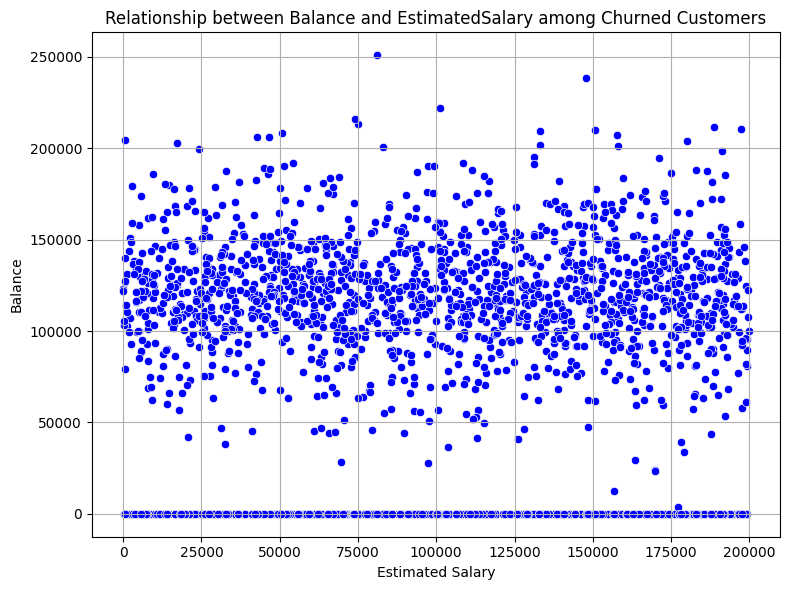

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='EstimatedSalary', y='Balance', data=df_churned, color='blue')
plt.title('Relationship between Balance and EstimatedSalary among Churned Customers')
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.grid(axis='both')
plt.tight_layout()
plt.show()

In [ ]:
product_usage_counts = d3['Tenure'].value_counts()
top_products = product_usage_counts.head(10)
print("Top 10 Most Commonly Used Products or Services:")
print(top_products)

Top 10 Most Commonly Used Products or Services:
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
Name: count, dtype: int64


In [ ]:
# Group by customer segments and products to get usage patterns
segment_product_usage = d3.groupby(['Segment', 'Product'])['UsageCount'].sum().unstack().fillna(0)

print("Usage patterns across different customer segments:")
print(segment_product_usage)
# Plotting the usage patterns across different customer segments
segment_product_usage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Customer Segment')
plt.ylabel('Usage Count')
plt.title('Product Usage Patterns Across Customer Segments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'Segment'

3.  Product Usage:

   - What are the most commonly used products or services?

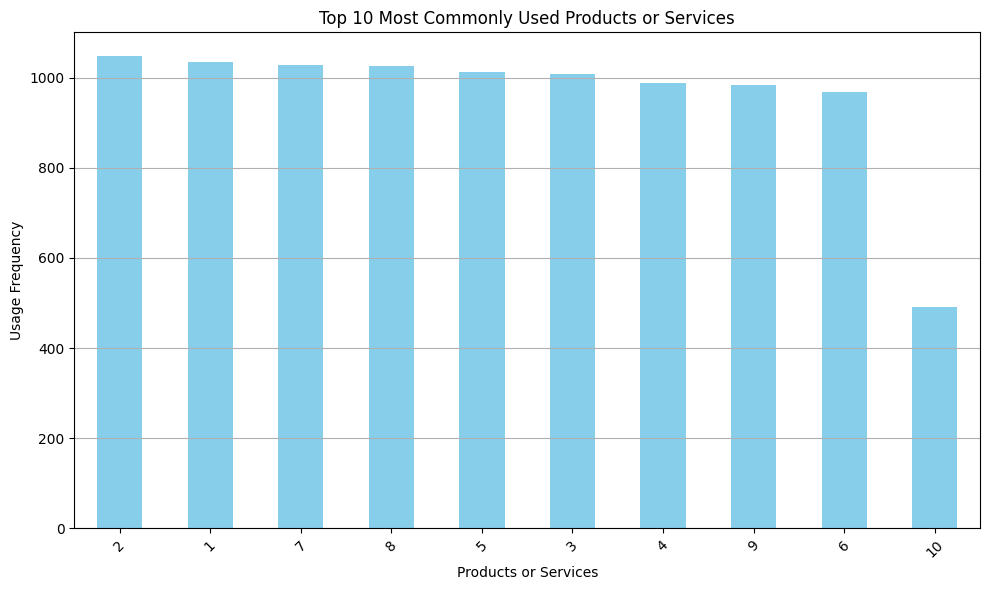

In [ ]:

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Commonly Used Products or Services')
plt.xlabel('Products or Services')
plt.ylabel('Usage Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

   - Analyze the usage patterns of different customer segments.



<ipython-input-33-7579e1f9e77e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=usage_metrics.index, y=usage_metrics.values, palette='viridis')


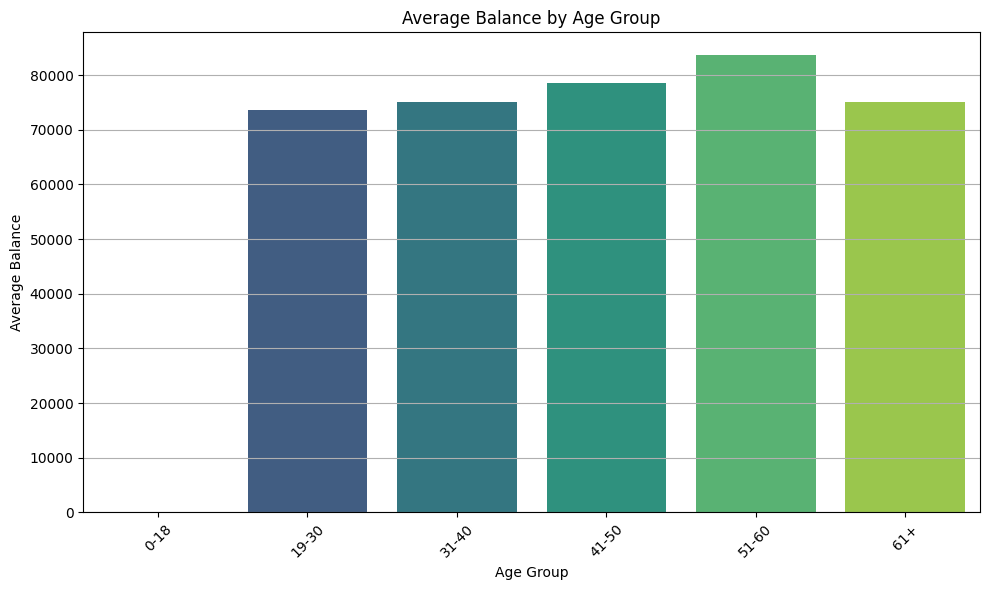

In [ ]:
usage_metrics = d3.groupby('AgeGroup')['Balance'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=usage_metrics.index, y=usage_metrics.values, palette='viridis')
plt.title('Average Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
segments1 = ['France', 'Spain', 'Germany']
segments1

['France', 'Spain', 'Germany']

<ipython-input-28-ef836ef708a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=usage_metrics.index, y=usage_metrics.values, palette='viridis')


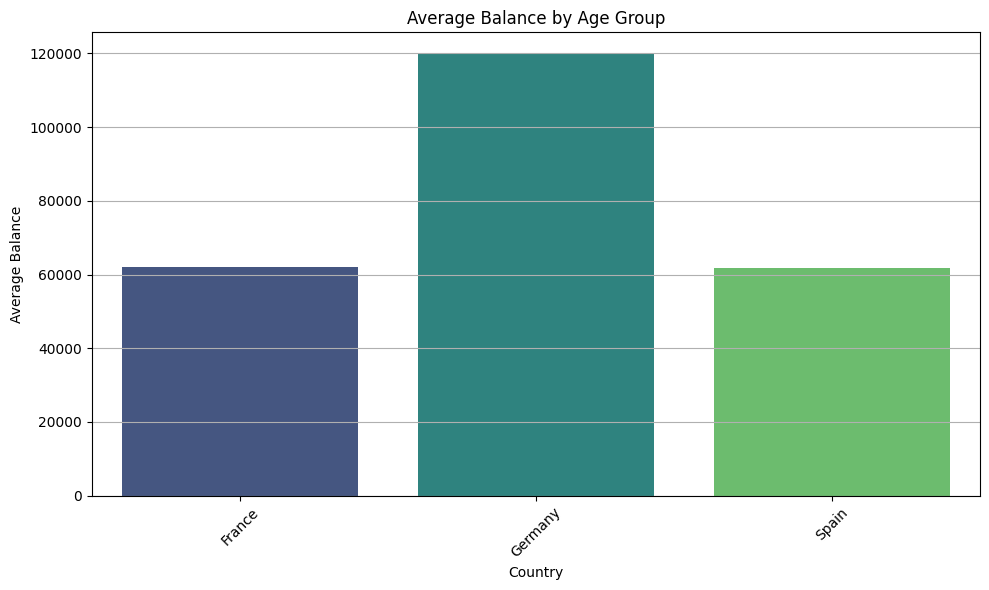

In [ ]:
usage_metrics = d3.groupby('Geography')['Balance'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=usage_metrics.index, y=usage_metrics.values, palette='viridis')
plt.title('Average Balance by Age Group')
plt.xlabel('Country')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
average_balance = d3['Balance'].mean()
average_balance

76485.889288

In [ ]:
print("Average Balance:", average_balance)


Average Balance: 76485.889288


In [ ]:
df_churned = d3[d3['churned'] == 1]
df_not_churned = d3[d3['churned'] == 0]


In [ ]:
average_balance_churned = df_churned['Balance'].mean()
average_balance_not_churned = df_not_churned['Balance'].mean()


In [ ]:
print(average_balance_churned)
print(average_balance_not_churned)

91108.53933726068
72745.2967788522


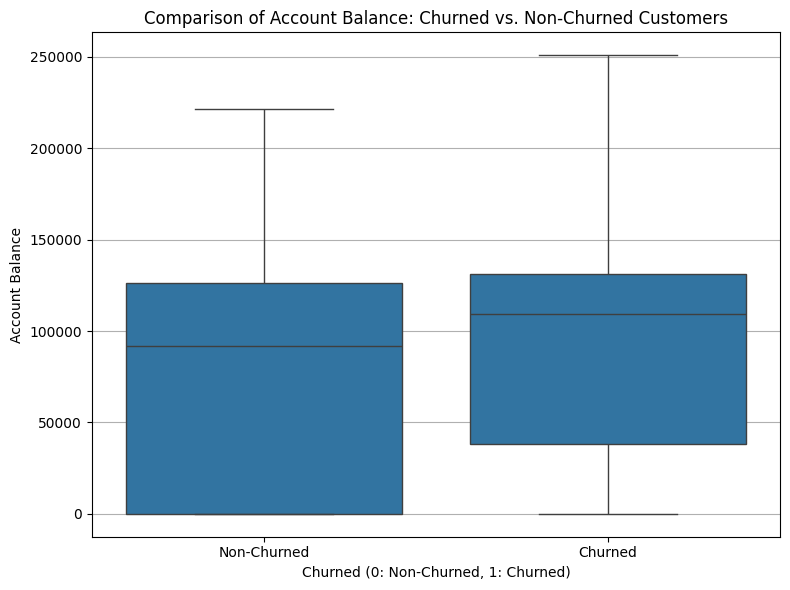

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churned', y='Balance', data=d3)
plt.title('Comparison of Account Balance: Churned vs. Non-Churned Customers')
plt.xlabel('Churned (0: Non-Churned, 1: Churned)')
plt.ylabel('Account Balance')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
X = d3[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = d3['churned']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")


AUC Score: 0.67


<ipython-input-42-9f2b57107943>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


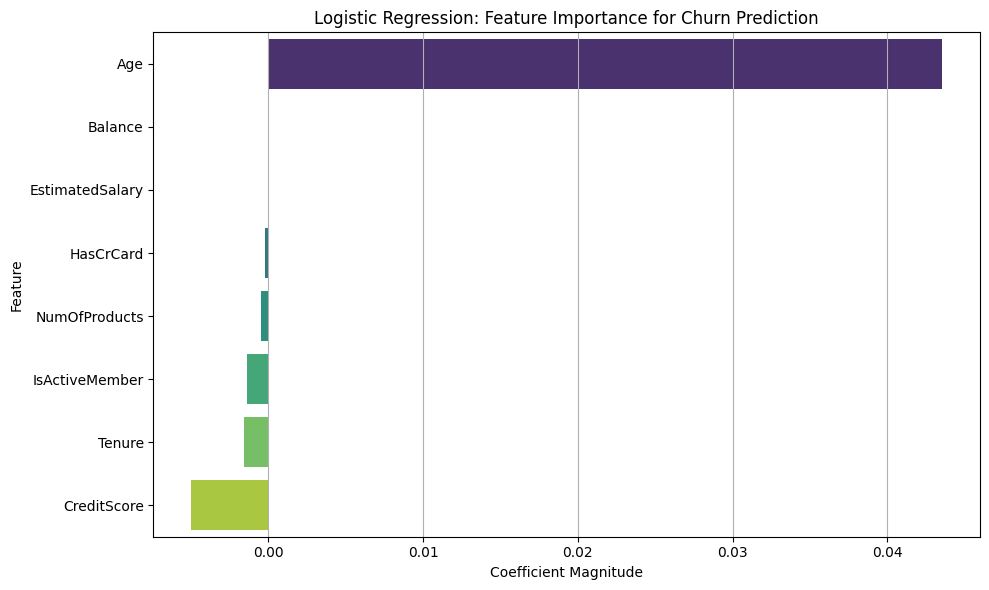

In [ ]:
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Logistic Regression: Feature Importance for Churn Prediction')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
print("Feature Importance (Ranked):")
print(feature_importance)

Feature Importance (Ranked):
Age                0.043551
Balance            0.000004
EstimatedSalary   -0.000001
HasCrCard         -0.000179
NumOfProducts     -0.000458
IsActiveMember    -0.001392
Tenure            -0.001535
CreditScore       -0.004988
dtype: float64


In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

new_data = pd.DataFrame([[650, 35, 5, 50000, 2, 1, 1, 80000]], columns=X.columns)
risk_prediction = model.predict_proba(new_data)[:, 1]
print(f"Predicted Churn Risk: {risk_prediction[0]:.2%}")

AUC Score: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

Predicted Churn Risk: 16.00%
